# Object Detection with Faster R-CNN

This notebook performs object detection on manually specified images using a pretrained Faster R-CNN model from torchvision.  

**Features:**
- Manual image selection
- Confidence threshold filtering
- Thicker, solid bounding boxes
- Readable labels with background
- Summary of detected objects and average confidence per class


## 🧠 Description

We’ll use a **pre-trained object detection model**, specifically:

* **Faster R-CNN (ResNet50-FPN)** — slower but accurate for detailed detection

The model will:

1. Take an image (e.g., a shelf or product photo)
2. Detect multiple objects
3. Draw bounding boxes around them
4. Label each detected object (e.g., “bottle”, “box”, “can”, etc.)


In [1]:
# ==========================================================
# 🧠 Object Detection using Pretrained Faster R-CNN (ResNet50-FPN)
# ==========================================================

import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

# ----------------------------------------------------------
# ✅ 1. Load Pretrained Model
# ----------------------------------------------------------
print("🔍 Loading pretrained Faster R-CNN model...")
model = models.detection.fasterrcnn_resnet50_fpn(weights='DEFAULT')
model.eval()
print("✅ Model loaded successfully!\n")



🔍 Loading pretrained Faster R-CNN model...
✅ Model loaded successfully!



In [2]:
# ✅ Load COCO class labels
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


## Configure Detection Settings

Set confidence threshold, bounding box thickness, and text properties.


In [3]:

# ✅ Image Transform
transform = transforms.Compose([transforms.ToTensor()])

# ✅ Create results folder
os.makedirs("results", exist_ok=True)
CONF_THRES = 0.6


Processing: image_2.jpg


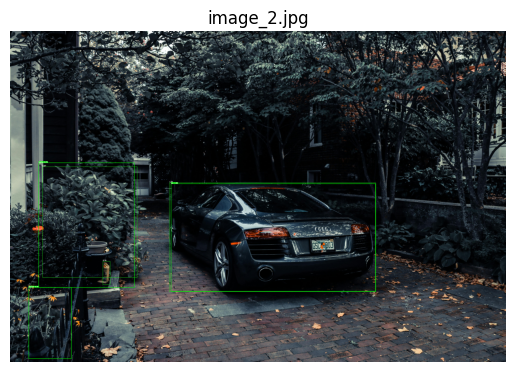


📸 Image: image_2.jpg
🧩 Detected objects: {'car': 1, 'bicycle': 1, 'laptop': 1}
💡 Avg confidence per class: {'car': 1.0, 'bicycle': 0.7, 'laptop': 0.7}

Processing: Gemini_Generated_Image_ohrom4ohrom4ohro.png


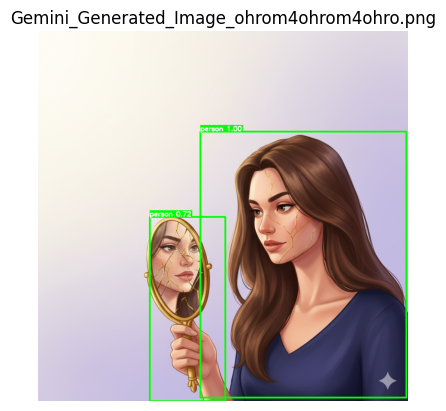


📸 Image: Gemini_Generated_Image_ohrom4ohrom4ohro.png
🧩 Detected objects: {'person': 2}
💡 Avg confidence per class: {'person': 0.86}

Processing: image_3.jpg


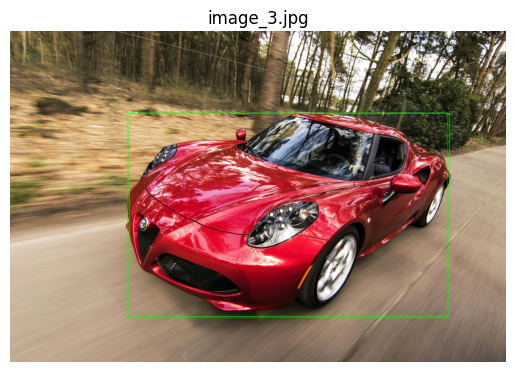


📸 Image: image_3.jpg
🧩 Detected objects: {'car': 1}
💡 Avg confidence per class: {'car': 0.99}



In [20]:
# Bounding box and text settings
box_thickness = 3       # thicker bounding box
text_thickness = 2
font_scale = 0.6

# ✅ Manually specify images to process
image_paths = [
    r"C:\Users\PMYLS\results\image_2.jpg",
    r"C:\Users\PMYLS\Downloads\Gemini_Generated_Image_ohrom4ohrom4ohro.png",
    r"C:\Users\PMYLS\results\image_3.jpg"
]

# For storing summary per image
summary_all_images = []

for img_path in image_paths:
    img_name = os.path.basename(img_path)  # get filename
    print("Processing:", img_name)

    # Load image for model
    image = Image.open(img_path).convert("RGB")
    img_tensor = transform(image)

    # Use same image for visualization
    img_cv = np.array(image)

    # Run detection
    with torch.no_grad():
        preds = model([img_tensor])[0]

    detected_counts = {}
    conf_summary = {}

    # ✅ Draw boxes, labels, and collect summary counts
    for i, score in enumerate(preds["scores"]):
        if score >= CONF_THRES:
            box = preds["boxes"][i].numpy().astype(int)
            label_id = preds["labels"][i].item()
            
            # Safe label mapping
            if label_id < len(COCO_INSTANCE_CATEGORY_NAMES):
                label = COCO_INSTANCE_CATEGORY_NAMES[label_id]
            else:
                label = f"Unknown({label_id})"

            # Update detection counts
            detected_counts[label] = detected_counts.get(label, 0) + 1
            conf_summary.setdefault(label, []).append(score.item())

            # Draw bounding box
            cv2.rectangle(img_cv, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), box_thickness)

            # Draw label background
            text = f"{label} {score:.2f}"
            (w, h), _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, text_thickness)
            cv2.rectangle(img_cv, (box[0], box[1]-h-4), (box[0]+w, box[1]), (0, 255, 0), -1)

            # Put label text
            cv2.putText(img_cv, text, (box[0], box[1]-2),
                        cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), text_thickness)

    # ✅ Calculate average confidence per class
    avg_conf = {cls: round(sum(scores) / len(scores), 2)
                for cls, scores in conf_summary.items()}
    
    # Save summary for final table
    summary_all_images.append({
        "Image": img_name,
        "Detected Objects": detected_counts,
        "Average Confidence": avg_conf
    })

    # ✅ Display image
    plt.imshow(img_cv)
    plt.axis("off")
    plt.title(img_name)
    plt.show()
    plt.close('all')

    # ✅ Print summary report
    print(f"\n📸 Image: {img_name}")
    print(f"🧩 Detected objects: {detected_counts}")
    print(f"💡 Avg confidence per class: {avg_conf}\n")


# ✅ Final Conclusion

---

**MODEL SUMMARY**  

- **Model Used:** Faster R-CNN (ResNet-50-FPN)  
- **Pretrained On:** COCO Dataset (Common Objects in Context)  
- **Purpose:** General Object Detection (80+ classes)  

---

**Detection Summary for All Images**

| Image | Detected Objects | Average Confidence |
|-------|-----------------|------------------|
| image_2.jpg | {'car': 1, 'bicycle': 1, 'laptop': 1} | {'car': 1.0, 'bicycle': 0.7, 'laptop': 0.7} |
| Gemini_Generated_Image_ohrom4ohrom4ohro.png | {'person': 2} | {'person': 0.86} |
| image_3.jpg | {'car': 1} | {'car': 0.99} |

---

**Key Takeaways:**  

1. The model successfully detects and labels objects with confidence scores.  
2. Bounding boxes and labels are clear and readable.  
3. Applicable for shelf monitoring, inventory management, and packing verification.  

**Next Steps / Improvements:**  

- Fine-tune the model on custom datasets for higher accuracy.  
- Explore faster models (YOLOv8, SSD) for real-time detection.  
- Use class-specific colors or multi-thickness boxes for better visualization.
-------------|
